# Customer Segmentation

Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.

Buna yönelik olarak müşterilerin davranışlarını tanımlayacağız ve bu davranışlarda öbeklenmelere göre gruplar oluşturacağız.

Yani ortak davranışlar sergileyenleri aynı gruplara alacağız ve bu gruplara özel satış ve pazarlama teknikleri geliştirmeye çalışacağız.

**Veri Seti Hikayesi**

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.

Bu şirket hediyelik eşya satıyor. Promosyon ürünleri gibi düşünebilir.

Müşterilerinin çoğu da toptancı.

**Değişkenler**

- **InvoiceNo**: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.
- **StockCode**: Ürün kodu. Her bir ürün için eşsiz numara.
- **Description**: Ürün ismi
- **Quantity**: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
- **InvoiceDate**: Fatura tarihi ve zamanı. 
- **UnitPrice**: Ürün fiyatı (Sterlin cinsinden)
- **CustomerID**: Eşsiz müşteri numarası
- **Country**: Ülke ismi. Müşterinin yaşadığı ülke.



# Data Understanding 

In [1]:
#Gerekli olan kütüphanelerin import işlemleri yapılmıştır.
import pandas as pd
import numpy as np
import seaborn as sns

#Tüm sutünları ve satırları gözlemlemek için kullandığımız kod.
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

#virgulden sonra gösterilecek olan sayı sayısı
pd.set_option('display.float_format', lambda x: '%.0f' % x)
import matplotlib.pyplot as plt

In [2]:
#Veri seti okuma işlemi gerçekleştirildi.
df_2010_2011 = pd.read_excel("../input/uci-online-retail-ii-data-set/online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [3]:
#Veri seti boyutu büyük olduğu için okuma işlemi uzun sürdü bu sebeple veri setini kopyalama işlemi yaptık.
df = df_2010_2011.copy()

# Pandas kütüphanesi ile veriyi anlamaya çalışınız.

In [4]:
#Veri setine ait ilk 5 gözlem birimine eriştik.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


In [5]:
#essiz ürün sayısı nedir?
df["Description"].nunique()

4223

In [6]:
#hangi üründen kaçar tane var?
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [7]:
#en çok sipariş edilen ürün hangisi?
df.groupby("Description").agg({"Quantity":"sum"}).head()

,Quantity
Description,
20713,-400
4 PURPLE FLOCK DINNER CANDLES,144
50'S CHRISTMAS GIFT BAG LARGE,1913
DOLLY GIRL BEAKER,2448
I LOVE LONDON MINI BACKPACK,389


In [8]:
#yukarıdaki çıktıyı nasıl sıralarız?
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [9]:
#toplam kaç fatura kesilmiştir?
df["Invoice"].nunique()

25900

In [10]:
#fatura basina toplam kac para kazanilmistir? (iki değişkeni çarparak yeni bir değişken oluşturmak gerekmektedir)
#kaç para kazanıldığını bulmak için "adet(Quantity) * fiyat(Price)" yapılması gerekir. 
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [11]:
#Dataframe "Total Price" değişkeni eklenmiştir. Bu değişken ilk 5 gözlem üzerinden incelenmiştir. 
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [12]:
#Fatura numarasına (Invoice) göre gruplayıp "Total Price" değişkenin toplamını getirildi. 
#Bu şekilde fatura başına toplam kaç para kazanıldı hesaplanmıştır.
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139
536366,22
536367,279
536368,70
536369,18


In [13]:
#en pahalı ürünler hangileri?
#Ürünlerin ismine göre groupby yapılarak "Price" değişkenin max değeri alınmıştır ve azalan şekilde sıralanmıştır.
df.groupby("Description").agg({"Price":"max"}).sort_values("Price", ascending = False).head()

,Price
Description,
Manual,38970
AMAZON FEE,17836
Adjust bad debt,11062
POSTAGE,8143
DOTCOM POSTAGE,4505


In [14]:
#en pahalı ürünler hangileri? 
#Farklı bir çözüm olarak direk dataframe üzerinden "Price" değişkenine göre azalan şekilde sıralama yapılmaktadır. 
df.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970,15098,United Kingdom,-38970
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836,nan,United Kingdom,-17836
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888,nan,United Kingdom,-16888
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16454,nan,United Kingdom,-16454
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541,nan,United Kingdom,-13541


In [15]:
#hangi ülkeden kac sipariş geldi?
#Ülke kategorik bir değişken olduğu için kategorik değişkenlerin sınıflarını value_counts() fonksiyonu ile saydırabiliriz.
df["Country"].value_counts().head()

United Kingdom    495478
Germany             9495
France              8558
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [16]:
#hangi ülke ne kadar kazandırdı?
#Ülkelere göre groupby yapılarak "Total Price" değişkenini toplamı alınarak hangi ülke ne kadar bırakmış öğrenilmiştir.
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,8187806
Netherlands,284662
EIRE,263277
Germany,221698
France,197422


In [17]:
#en çok iade alan ürün hangisidir?
#Invoice değişkeninde yer alan kodlar başında "C" ifadesi iade anlamına gelmektedir.
#Veri setinde şu anda na değerler olduğu için str.contains komutu içinde na değerlerini False olarak tanımlayıp görmezden gel diyoruz.
#Adet işlemi için de "Quantity" değişkenini azalan şekilde sıralarsak yakaladığımız Invoice değişkenine göre en çok iadeleri buluruz.
returned = df[df["Invoice"].str.contains("C",na=False)]
returned.sort_values("Quantity", ascending = True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2,16446,United Kingdom,-168470
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1,12346,United Kingdom,-77184
4268,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0,15838,United Kingdom,-281
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2,15749,United Kingdom,-6539
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,2,15749,United Kingdom,-3700


# Data Preparation

# Eksik Gözlem Analizi

In [18]:
# Hiç eksik gözlem var mı sorusunu sormaktadır.
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
TotalPrice          0
dtype: int64

In [19]:
# Elimdeki veri setinde yaklaşık olarak 500000 gözlemden oluşan bir veri seti var bu nedenle eksik gözlemleri silebilirim.
df.dropna(inplace = True)

In [20]:
#Silme işleminden sonra tekrardan kontrol ediyorum eksik gözlem var mı?
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [21]:
#Boyut bilgisine erişilmektedir.
df.shape

(406830, 9)

In [22]:
#Çeyrekliklerini(Kartiller) kendimiz belirleyerek betimsel istatistiklere bakılmaktadır. Veri seti hakkında incelemeler yapılmaktadır.
df.describe([0.05,0.01,0.25,0.50,0.75,0.80,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,80%,90%,95%,99%,max
Quantity,406830,12,249,-80995,-2,1,2,5,12,12,24,36,120,80995
Price,406830,3,69,0,0,0,1,2,4,4,7,8,15,38970
Customer ID,406830,15288,1714,12346,12415,12626,13953,15152,16791,17095,17719,17905,18212,18287
TotalPrice,406830,20,428,-168470,-10,1,4,11,20,21,35,67,200,168470


# Aykırı Gözlem Analizi

In [23]:
# Aykırı gözlem analizinde en yaygın kullanılan method bir alt limit ve üst limit belirleyerek baskılamaktır.
# Burada 1. ve 3. çeyreklikler göz önüne alınarak IQR hesaplanır ve alt, üst sınırlar burada belirlenir. 
# Neden sadece bu değişkenler çünkü yukarıdaki kodda Customer ID hariç aykırı gözlem analizi olduğu saptanmıştır.
#Burada aykırı gözlemlere ucundan değinilerek bu problem ortadan kaldırılmıştır.
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
948
Price yes
846
TotalPrice yes
1030


# RFM Skorları ile Müşteri Segmentasyonu

Recency, Frequency, Monetary ifadelerinin baş harflerinden oluşur.

Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

- Recency (yenilik): Müşterinin son satın almasından bugüne kadar geçen süre

    -- Diğer bir ifadesiyle “Müşterinin son temasından bugüne kadar geçen süre” dir.

    -- Bugünün tarihi - Son satın alma

    -- Örnek verecek olursak bugün bu analizi yapıyorsak bugünün tarihi - son 	ürün satın alma tarihi.

    -- Bu örneğin 20 olabilir 100 olabilir. Biliriz ki 20 olan müşteri daha sıcaktır. Daha son zamanlarda bizimle teması olmuştur.

- Frequency (Sıklık): Toplam satın alma sayısı.

- Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.

In [24]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
 8   TotalPrice   406830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [26]:
df.shape

(406830, 9)

# Recency Score Hesaplama

**Recency Score = Bugünün tarihi - Son satın alma**

Bugün nedir? Şimdi eğer günümüz tarihini alırsak bu durumda arada çok ciddi bir fark olacaktır.

Bu sebeple örnek olması açısından kendimize bu veri setinin yapısına göre bir "bugün" belirleyelim.

Bu günü veri setinin maksimum günü olarak belirleyebiliriz.

Son kayıt düşülen güne göre segmentasyon yapabiliriz.

Yapılacak olan işlem analizin yapılacağı günden, Customer ID değişkenine göre groupby yapmak ve InvoiceDate değişkeninin maksimum değerleri alınarak bu iki değeri birbirinden çıkararak Recency Score hesaplanmış olacaktır. 

In [27]:
#Alışverişin yapıldığı ilk gün
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [28]:
#Alışverişin yapıldığı son gün
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [29]:
#Analiz için gerekli import işlemi yapılarak max değer analizi yaptığımız gün olarak belirlenmiştir. Bu değer today_date olarak atanmıştır.
import datetime as dt
today_date = dt.datetime(2011,12,9)
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [30]:
#Customer ID değerine göre groupby işlemi yapılıp Invoice Date değişkenin max değerleri getirildi. 
#Yani son alışveriş yapılan tarihler geldi. Müşteri ID sine göre son yapılan alışveriş tarihlerine ulaştık. 
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:17:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [31]:
# Customer ID değişkeni stringe dönüştürülmüştür.
df["Customer ID"] = df["Customer ID"].astype(int)

In [32]:
# Analizin yapıldığı gün - Son alışveriş yapılan tarih işlemi yapıldığında recency değerini yakaladık.
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.head()

,InvoiceDate
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [33]:
# Analiz yapıldı ve burada InvoıceDate değişkeninin adını Recency olarak değiştirilmektedir.
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
temp_df.head()

,Recency
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [34]:
#Yukarıda yapılan işlem sonucunda Recency değişkeninde saat değerlerini silmek istiyorum.
#Bunu yapabilmek için, daha önce burası Invoice Date değişkeni ve veri tipi datetime olduğu için days'leri seçip saatleri silebiliriz. 
recency_df = temp_df["Recency"].apply(lambda x: x.days)
recency_df.head()

Customer ID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64

# Frequency Score Hesaplama
**Frequency (Sıklık): Toplam satın alma sayısı**

Yapılacak olan işlem Customer ID değişkenine göre groupby yapmak ve Invoice değişkeninin toplamı getirilerek Frequency Score hesaplanmış olacaktır. 

In [35]:
#Customer ID ye göre ve Invoice'a gruopby yap ve Invoice değişkenini say.
temp_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
temp_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
            C541433        1
12347       537626        31
            542237        29
            549222        24

In [36]:
#Customer ID ye göre gruopby yap ve Invoice değişkenini topla. Yani her müşteri kaç alışveriş yapmış toplamda bunu bulmuş oluyoruz.
temp_df.groupby("Customer ID").agg({"Invoice":"count"}).head()

,Invoice
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [37]:
#Burada yukarıda yapmış olduğumuz işlemi bir değişkene atayıp "Invoice" yazan değişkeni de "Frequency" olarak değiştirip gözlemliyoruz.
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


# Monetary Score Hesaplama
**Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.**

Yapılacak olan işlem Müşteri denildiği için Customer ID değişkenine göre groupby işlemi yapılıp TotalPrice değişkeninin toplamı getirilerek Monetary Score hesaplanmış olacaktır.

In [38]:
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [39]:
#Sutün adlandırması değiştirildi.
monetary_df.rename(columns = {"TotalPrice": "Monetary"}, inplace = True)
monetary_df.head()

,Monetary
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


RFM Analizi için gerekli olan parametreler hesaplanmıştır. Şimdi bu parametereler üzerinden bazı işlemler ve yorumlar yapıyor olacağız. 

In [40]:
# Her bir parametrenin boyutlarına bakıldı. 
print(recency_df.shape,freq_df.shape,monetary_df.shape)

(4372,) (4372, 1) (4372, 1)


In [41]:
#Parametreleri bir dataframe olarak concat fonksiyonu yardımı ile birleştirdik.
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,2,0
12347,1,7,4310
12348,74,4,1797
12349,17,1,1758
12350,309,1,334


RFM Analizinde yaygın olarak kullanılmakta olan bir tablo bulunmaktadır. Aşağıda bunu sizinle paylaşmaktayım. Genelde bu tablolarda 2 parametre kullanılmaktadır. Bunlar Recency ve Frequency değerleridir. Burada bu parametrelere değerler verilmektedir. Değerler görüldüğü üzere 1 ile 5 arasında olan değerlerdir. 5 çok iyi, 1 ise çok kötü anlamına gelmektedir. Bu tabloda görüldüğü üzere müşteriler segmentlere ayrılmış durumdadır. Parametre değerlerine bakılarak müşterilerin segmentleri belirlenmektedir. Bizlerin burada dikkat etmesi gereken grup aslında herkesin düşündüğü şampiyonlar grubu değil bu grup zaten sürekli olarak bizi ziyaret ediyor ve alışveriş yapıp para bırakıyor. Burada en dikkat gerektiren sınıf "can't loose them" sınıfıdır. Çünkü bu kişiler bizi nerdeyse hiç ziyaret etmiyor ve çok fazla alışveriş yapıyor yani frequency değerleri 5 gördüğünüz üzere bu nedenle bu sınıfa odaklanmamız gerekiyor. Çünkü bu grupta yer alan müşteriler bizi bıraktı bırakacak bu nedenle dikkat gerektirmekte ve bu gruptaki müşterileri gerekli analizler yaparak bize kazandırmalıyız. Aynı zamanda bir de "need attention" grubu bulunmakta Recency değeri 3, Frequency değeri 3 olan gruba ve uyku halinde olan gruba özel mailler atarak, promosyonlar yaparak canlandırıp tabloda sağa veya yukarıya doğru çıkarmamız gerekmektedir. Kısacası bu tabloyu bu şekilde açıklayabiliriz. RFM analizinin temel mantığının anlatıldığı tablo bu tablodur.  

Kullanılmakta olan tablonun linki: https://www.google.com/search?q=rfm+segmentation&rlz=1C1SQJL_enTR897TR897&sxsrf=ALeKk00QRYG0YdEatvcUWqTu98grgYKRpQ:1593694711305&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiO1Ja5z67qAhUSoRQKHSptACMQ_AUoAXoECA0QAw&biw=1920&bih=903#imgrc=ybEw0dx3uC2cOM

Aşağıdaki yer alan kod parçasında elde ettiğimiz parametreleri skorlara ayırmamız gerekmektedir. Az önce yukarıda tabloyu anlatırken değindiğim değerlerden bahsediyorum. Burada dikkatinizi çeken nokta Recency değeri olacaktır. Çünkü tersten bir skorlama yapılmaktadır. Bunun sebebi ise örneğin siz analiz yapılan günden 1 gün önce bizleri ziyaret ederek alışveriş yaptığınızı, diğer müşterimiz ise 100 gün önce bizleri ziyaret ederek alışveriş yaptığını düşünelim. Bu durumda Recency değeri **Analiz yapılan günün (Bugünün) tarihi - Son satın alma tarihi** formülü ile hesaplandığında burada siz bizi 1 gün önce ziyaret edip alışveriş yaptığınız hesaplanacaktır. Yani yakın zamanda alışveriş yaptığınız için **recency puanınız: 5** olacaktır. Diğer müşterimiz ise analiz yapılan günden 100 gün önce alışveriş yaptığı için **recency puanı 1 olacaktır.** Bu nedenle recency değeri düşük olana 5 puan, recency değeri yüksek olana 1 puan verilmektedir. Diğer iki parametre zaten satış arttıkça ve ödenen toplam para arttıkça skor değerleri de artacaktır. 
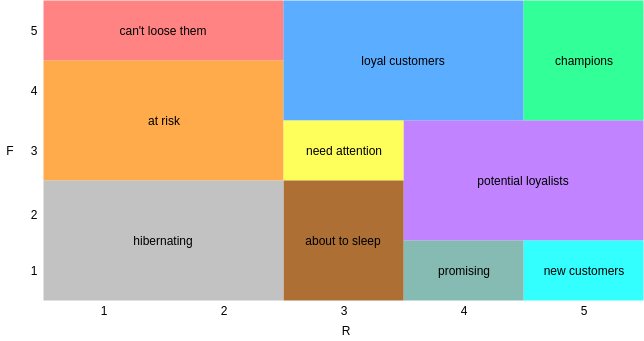

In [42]:
# Buradaki skorlama işlemi pandas içinde .qcut fonk. kullanılarak bölünmüştür.
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1,2,3,4,5])

In [43]:
#Skorlama işlemi sonrası dataframe ilk 5 gözlem biriminin incelenmesi
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,324,2,0,1,2,1
12347,1,7,4310,5,4,5
12348,74,4,1797,2,3,4
12349,17,1,1758,4,1,4
12350,309,1,334,1,1,2


In [44]:
#Skorları yanyana yazdırmak için yapılmaktadır.
(rfm['RecencyScore'].astype(str) + 
 rfm['FrequencyScore'].astype(str) + 
 rfm['MonetaryScore'].astype(str)).head()

Customer ID
12346    121
12347    545
12348    234
12349    414
12350    112
dtype: object

In [45]:
#Dataframe e RFM_SCORE sutünü eklenmiştir.
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,324,2,0,1,2,1,121
12347,1,7,4310,5,4,5,545
12348,74,4,1797,2,3,4,234
12349,17,1,1758,4,1,4,414
12350,309,1,334,1,1,2,112


In [46]:
#Betimsel istatistikleri incelenerek bazı yorumlar yapılmaktadır.
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372,91,101,-1,15,49,142,372
Frequency,4372,5,9,1,1,3,5,248
Monetary,4372,1898,8219,-4288,293,648,1612,279489


In [47]:
#En iyi müşteriler gösterilmektedir.
rfm[rfm["RFM_SCORE"] == "555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12362,2,13,5155,5,5,5,555
12417,2,12,3579,5,5,5,555
12437,0,19,4897,5,5,5,555
12471,1,49,18741,5,5,5,555
12476,0,20,6547,5,5,5,555


In [48]:
#En kötü müşteriler gösterilmektedir.
rfm[rfm["RFM_SCORE"] == "111"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353,203,1,89,1,1,1,111
12361,286,1,190,1,1,1,111
12401,302,1,84,1,1,1,111
12402,322,1,226,1,1,1,111
12441,365,1,174,1,1,1,111


In [49]:
#Burada rfm skorlarına göre sınıflar atanmaktadır. Bu sınıfların hangi skor aralığında olacağı aşağıda belirtilmiştir. 
#Örnek olarak Hibernating sınıfı şu skor değerlerine sahiptir. 
#Recency değeri 1-2, Frequency değeri 1-2 olanlardır diğer sınıflarda bu şekilde okunmaktadır.
#Buraya sadece Recency ve Frequency eklenmesinin sebebi tabloda sadece bu iki parametre yer aldığı için ancak Monetary de yanlarına eklenebilir.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [50]:
#Yukarıda tanımlanan seg_map'i dataframe dahil etme işlemi yapılmıştır.
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,324,2,0,1,2,1,121,Hibernating
12347,1,7,4310,5,4,5,545,Champions
12348,74,4,1797,2,3,4,234,At Risk
12349,17,1,1758,4,1,4,414,Promising
12350,309,1,334,1,1,2,112,Hibernating


In [51]:
#Segmentlere göre groupby yaparak elde edilen (kodda belirtilen) 3 parametrenin ortalama ve kaç adet olduğunu getirmektedir. 
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"]).head()

Recency       Frequency       Monetary      
                  mean count      mean count     mean count
Segment                                                    
About to Sleep      51   369         1   369      435   369
At Risk            157   603         3   603      951   603
Can't Loose        132    68        10    68     2381    68
Champions            4   665        15   665     6510   665
Hibernating        216  1053         1  1053      376  1053

In [52]:
#Bu segmentteki grup dikkat gerektiren grublardan birisiydi. Bunları yakalama işlemi yapılmıştır.
rfm[rfm["Segment"] == "Need Attention"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12360,51,3,2662,3,3,5,335,Need Attention
12370,50,4,3546,3,3,5,335,Need Attention
12372,70,3,1298,3,3,4,334,Need Attention
12546,45,3,1142,3,3,4,334,Need Attention
12759,51,3,1531,3,3,4,334,Need Attention


In [53]:
#Yeni müşterilere ait Customer ID (indeks) değerlerine erişilmiştir.
#Bu değerler müşteri departmanı ile paylaşılıp yeni müşterilere özel promosyonlar ve mailler bu ID'ler sayesinde atılabilir.
rfm[rfm["Segment"] == "New Customers"].index

Int64Index([12367, 12442, 12478, 12587, 12650, 12660, 12713, 12953, 12966,
            13017, 13153, 13188, 13298, 13349, 13428, 13436, 13560, 13790,
            13844, 14204, 14219, 14349, 14480, 14569, 14578, 14601, 14804,
            15097, 15148, 15195, 15318, 15471, 15520, 15539, 15540, 15619,
            15721, 15773, 15783, 15790, 15904, 15992],
           dtype='int64', name='Customer ID')

In [54]:
#Dikkat gerektiren müşterilerin Customer ID (indeks) değerlerine erişilmiştir.
#Bu değerler müşteri departmanı ile paylaşılıp dikkat gerektiren müşterilere özel promosyonlar ve mailler bu ID'ler sayesinde atılabilir.
rfm[rfm["Segment"] == "Need Attention"].index

Int64Index([12360, 12370, 12372, 12546, 12759, 12808, 12822, 12886, 12895,
            13032,
            ...
            18170, 18194, 18205, 18228, 18235, 18252, 18261, 18270, 18277,
            18287],
           dtype='int64', name='Customer ID', length=190)

In [55]:
#Yeni bir dataframe oluşturularak içerisine Need Attention grubuna ait müşterilerin ID bilgileri atılmıştır.
new_df = pd.DataFrame()
new_df["NeedAttentionID"] = rfm[rfm["Segment"] == "Need Attention"].index

In [56]:
#İlk 5 gözlem gözlemlenmiştir.
new_df.head()

,NeedAttentionID
0,12360
1,12370
2,12372
3,12546
4,12759


In [57]:
#Atanan bu ID'ler excel çıktısı alınarak müşteri departmanı ile paylaşılmaya hazır hale getirilmiştir.
new_df.to_excel("new_attention.xlsx")

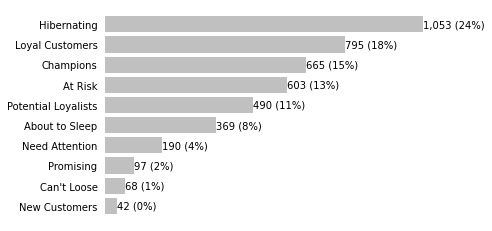

In [58]:
#Hangi segmentten kaç adet bulunmakta ve %kaçını oluşturmakta.
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# Yorumlar ve Alınacak olan Aksiyonlar

In [59]:
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count","max"]).head(20)

Recency            Frequency            Monetary        \
                       mean count  max      mean count  max     mean count   
Segment                                                                      
About to Sleep           51   369   70         1   369    2      435   369   
At Risk                 157   603  371         3   603    7      951   603   
Can't Loose             132    68  311        10    68   35     2381    68   
Champions                 4   665   10        15   665  248     6510   665   
Hibernating             216  1053  372         1  1053    2      376  1053   
Loyal Customers          31   795   70         8   795   76     2703   795   
Need Attention           48   190   70         3   190    4      790   190   
New Customers             5    42   10         1    42    1      377    42   
Potential Loyalists      15   490   30         2   490    4      684   490   
Promising                21    97   30         1    97    1      303    97   

                            
                       max  
Segment                     
About to Sleep        6208  
At Risk              21536  
Can't Loose          10217  
Champions           279489  
Hibernating           7830  
Loyal Customers     123725  
Need Attention        3546  
New Customers         3861  
Potential Loyalists  12394  
Promising             1758

Yorumlarımı yukarıda yer alan betimsel istatistiklere göre gerçekleştireceğim. Seçilecek olan 4 segment şunlardır;

- **Champions**
- **About to Sleep**
- **Need Attention**
- **Can't Loose**

**Champions**
- bu segmentte 665 kişi bulunmakta,
- ortalama olarak en son alışverişleri 4 gün önce gerçekleşmiş,
- alışveriş sıklıkları 15, toplamda 248 alışverişleri var,
- 279489 dolar/TL harcamaları olmuş.

**About to Sleep**
- bu segmentte 369 kişi bulunmakta,
- ortalama olarak en son alışverişleri 51 gün önce gerçekleşmiş,
- alışveriş sıklıkları 1, toplamda 2 alışverişleri var,
- 6208 dolar/TL harcamaları olmuş.

**Need Attention**
- bu segmentte 190 kişi bulunmakta,
- ortalama olarak en son alışverişleri 48 gün önce gerçekleşmiş,
- alışveriş sıklıkları 3, toplamda 4 alışverişleri var,
- 3546 dolar/TL harcamaları olmuş.

**Can't Loose**
- bu segmentte 68 kişi bulunmakta,
- ortalama olarak en son alışverişleri 132 gün önce gerçekleşmiş,
- alışveriş sıklıkları 10, toplamda 35 alışverişleri var,
- 10217 dolar/TL harcamaları olmuş.

**AKSİYON**

**Champions** segmentindeki kişiler ile iletişim kurmak kendilerini değerli ve takdir edilmiş kişiler olarak hissettirecektir. Bu müşteriler muhtemelen toplam gelirlerin orantısız olarak yüksek bir yüzdesini oluşturmaktadır ve bu nedenle onları mutlu etmeye odaklanmak en büyük öncelik olmalıdır. Bireysel tercihlerini ve yakınlıklarını daha fazla analiz ederek, daha kişiselleştirilmiş mesajlaşma için ek fırsatlar sağlayacaktır. Örneğin doğum günlerini kutlama gibi kişisel mesajlar gönderilebilir. Yeni ürünler için erken benimsiyor olabilirler onlara yeni ürünlerimizi ücretsiz olarak ileterek markamızı tanıtmamıza yardımcı olabilirler.

**About to sleep** segmentindeki kişilere değerli kaynaklarımızı paylaşarak, popüler ürünleri / yenilemeleri indirimli olarak önerip, onlarla yeniden bağlantı kurup müşterimiz yapabiliriz.

**Need Attention** segmentindeki kişilere sınırlı süreli teklifler yapabiliriz bu onları bizimle alışveriş yapmaya doğru itecektir, geçmiş satın alımlara dayanarak tavsiye ürünlerde bulunabiliriz. Bu şekilde onları yeniden etkinleştirerek alışveriş yapmalarını sağlayabiliriz.

**Can't Loose** önem verilmesi gerekilen segmentlerden birisidir. Bu segment bizim kaybetmek istemediğimiz segmenttir. Son alışverişleri 132 gün önce yapılmış olması kötü bir sonuçtur. Ancak toplam yapılan alışveriş sayısı oldukça yüksek bir rakamdır 35 adet toplam satış olmuş. Aslında alışveriş yapıyorlar ama tek seferde veya birkaç seferde girip toplu bir şekilde alışveriş yapıp uzun bir süre tekrar alışveriş yapmıyorlar. Bu segmentte yer alan kişilere yenilemeler, daha yeni ürünleri onlara önererek veya bu sınıfa özel promosyonlar, küçük çaplı para puanlar verilerek geri kazanabiliriz, burada yer alan kişileri rekabete sokmamalıyız, onlarla konuşarak mailler ve smsler atarak kazanabiliriz. Neyin yanlış gittiğini öğrenmek için anketler yaparak anket sonuçlarından düzeltmeler yapılabiliriz.